In [1]:
import json
import collections
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 500)
%matplotlib notebook

In [2]:
naming_dict = {'player_won':'monster_defeated',
               'gold_loot':'monster_loot',
               'item_buy_price':'item_buyPrice',
               'player_player_id':'player_id',
               'player_item_slot_1_id':'player_item1_id',
               'player_item_slot_1_level':'player_item1_level',
               'player_item_slot_1_name':'player_item1_name',
               'player_item_slot_1_strength':'player_item1_strength',
               'player_item_slot_1_wisdom':'player_item1_wisdom',
               'player_item_slot_1_buy_price':'player_item1_buyPrice',
               'player_item_slot_2_id':'player_item2_id',
               'player_item_slot_2_level':'player_item2_level',
               'player_item_slot_2_name':'player_item2_name',
               'player_item_slot_2_strength':'player_item2_strength',
               'player_item_slot_2_wisdom':'player_item2_wisdom',
               'player_item_slot_2_buy_price':'player_item2_buyPrice'}

In [3]:
# Parse log file to csv

log_file = './creepy.log'

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

temp = []
with open(log_file, "r") as file:
    for line in file:
        temp.append(flatten(json.loads(line)))
data = pd.DataFrame(temp).rename(columns=naming_dict).set_index('timestamp')

data.to_csv("./creepy.csv", mode='w+')

In [4]:
data = pd.read_csv('./creepy.csv')

<IPython.core.display.Javascript object>


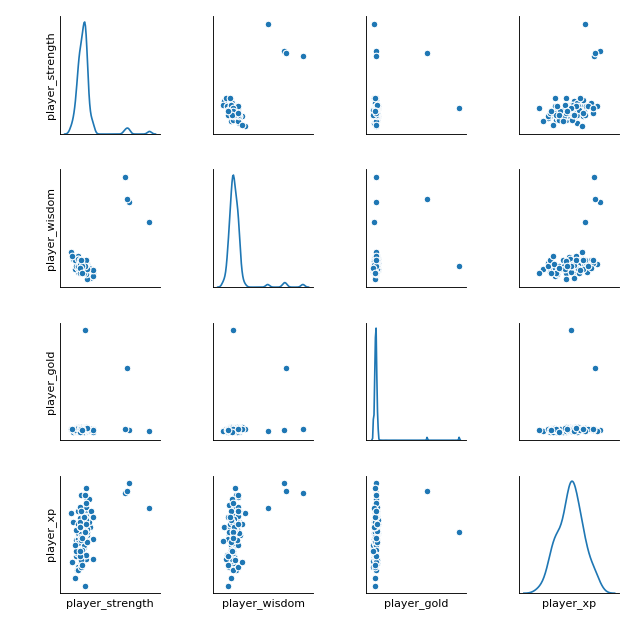

In [5]:
# scatter matrix with outlier

df = data

new = df[['player_strength','player_wisdom','player_gold','player_xp','player_id']].groupby('player_id')['player_strength','player_wisdom','player_gold','player_xp'].max()

g = sns.pairplot(new, diag_kind='kde', size=2)
g.set(yticks=[],xticks=[])

<IPython.core.display.Javascript object>


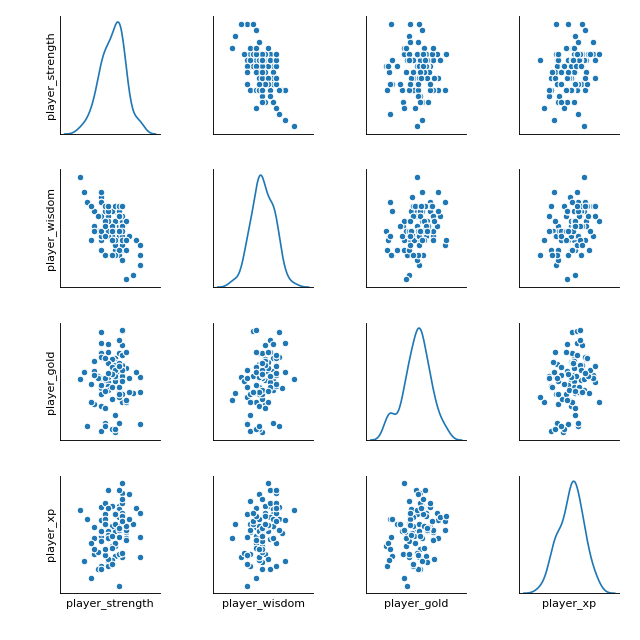

In [6]:
# scatter matrix without outlier

df = data

top_unique = ['E3CA5E8B-848A-4964-B7D478FC67AD7761',
              '06B69463-5C48-4596-9503DEDECCBD21E9',
              'D8FBF2DA-4CA4-400A-80B1EF22F3244628',
              '0DBAB841-C633-4B41-91DF4AE74DF138E4',
              'EAA7972B-B05D-426E-B70733E391DFBB67']

new = (df[['player_strength','player_wisdom','player_gold','player_xp','player_id']]
       .groupby('player_id')['player_strength','player_wisdom','player_gold','player_xp']
       .max().drop(top_unique))

g = sns.pairplot(new, diag_kind='kde', size=2)
g.set(yticks=[],xticks=[])

/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


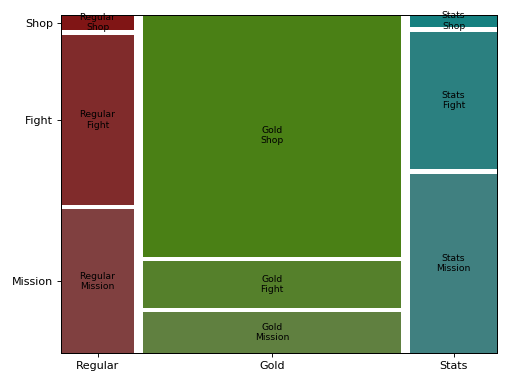

In [7]:
# Mosaic plot of event avg counts

df = data

temp = df[df.player_id != 'E3CA5E8B-848A-4964-B7D478FC67AD7761']
temp = temp[df.player_id != '06B69463-5C48-4596-9503DEDECCBD21E9']
temp = temp[df.player_id != 'D8FBF2DA-4CA4-400A-80B1EF22F3244628']
temp = temp[df.player_id != '0DBAB841-C633-4B41-91DF4AE74DF138E4']
df_no_outliers = temp[df.player_id != 'EAA7972B-B05D-426E-B70733E391DFBB67']

temp1 = df[df.player_id == 'EAA7972B-B05D-426E-B70733E391DFBB67']
df_top_gold = temp1.sort_values('timestamp')

temp3 = df[df.player_id == 'E3CA5E8B-848A-4964-B7D478FC67AD7761']
temp4 = df[df.player_id == '06B69463-5C48-4596-9503DEDECCBD21E9']
temp5 = df[df.player_id == '0DBAB841-C633-4B41-91DF4AE74DF138E4']
df_top_stat = temp3.append(temp4).append(temp5).sort_values('timestamp')

reg_event_count_avg = df_no_outliers.groupby('event').size().drop(['level_up','shop_buy']).rename('Regular') / df_no_outliers['player_id'].nunique()
gold_event_count_avg = df_top_gold.groupby('event').size().drop(['level_up','shop_buy']).rename('Gold') / df_top_gold['player_id'].nunique()
stat_event_count_avg = df_top_stat.groupby('event').size().drop(['level_up','shop_buy']).rename('Stats') / df_top_stat['player_id'].nunique()

avg_event = pd.concat([reg_event_count_avg, gold_event_count_avg, stat_event_count_avg], axis=1).rename(index={'shop_sell':'Shop','fight':'Fight','completed_mission':'Mission'}).stack().swaplevel()

fig = plt.figure()
ax = fig.add_subplot(111)
mosaic(avg_event, gap=0.02, ax=ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


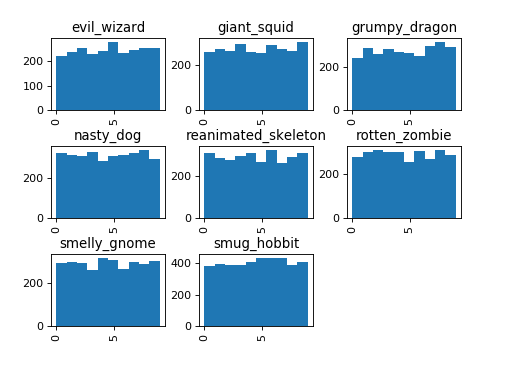

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a175b90f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0b3bea90>]], dtype=object)

In [8]:
# histograms of monster_loot distribution

df = data

all_monster_loot = df[df.event == 'fight'][['monster_type','monster_loot']] 

all_monster_loot.hist(by='monster_type')

/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/stephanegosselin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


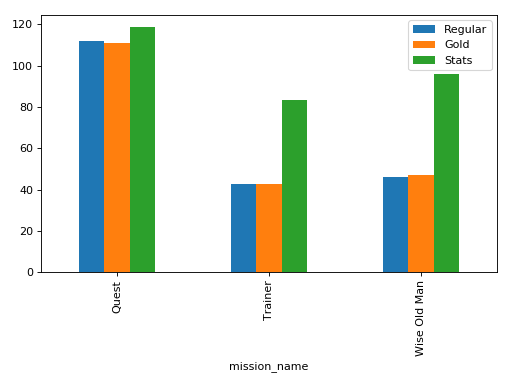

In [9]:
# bar plot of mission_name avg count

df = data

temp = df[df.player_id != 'E3CA5E8B-848A-4964-B7D478FC67AD7761']
temp = temp[df.player_id != '06B69463-5C48-4596-9503DEDECCBD21E9']
temp = temp[df.player_id != 'D8FBF2DA-4CA4-400A-80B1EF22F3244628']
temp = temp[df.player_id != '0DBAB841-C633-4B41-91DF4AE74DF138E4']
df_no_outliers = temp[df.player_id != 'EAA7972B-B05D-426E-B70733E391DFBB67']

temp1 = df[df.player_id == 'EAA7972B-B05D-426E-B70733E391DFBB67']
df_top_gold = temp1.sort_values('timestamp')

temp3 = df[df.player_id == 'E3CA5E8B-848A-4964-B7D478FC67AD7761']
temp4 = df[df.player_id == '06B69463-5C48-4596-9503DEDECCBD21E9']
temp5 = df[df.player_id == '0DBAB841-C633-4B41-91DF4AE74DF138E4']
df_top_stat = temp3.append(temp4).append(temp5).sort_values('timestamp')

reg_mission_count_avg = df_no_outliers.groupby('mission_name').size().rename('Regular') / df_no_outliers['player_id'].nunique()
gold_mission_count_avg = df_top_gold.groupby('mission_name').size().rename('Gold') / df_top_gold['player_id'].nunique()
stat_mission_count_avg = df_top_stat.groupby('mission_name').size().rename('Stats') / df_top_stat['player_id'].nunique()

avg_mission = pd.concat([reg_mission_count_avg, gold_mission_count_avg, stat_mission_count_avg], axis=1).rename(index={'quest':'Quest','trainer':'Trainer','wise_old_man':'Wise Old Man'})
avg_mission.plot.bar()
plt.tight_layout()